In [ ]:
# Optional: setup NoTexBook theme
%load_ext notexbook
%texify -fs 18

# Preamble & References

The material in this section has been **adapted** and **extended** from their original versions available on the wonderful (online) book entitled **Programming Differential Privacy**, _Differential privacy, for programmers_.

The book is intended to give you an introduction to the challenges of data privacy, introducing the techniques that have been developed for addressing those challenges, and help you understand how to implement some of those techniques.

(from _Introduction_ Chapter):

> This book assumes a working knowledge of Python, as well as basic knowledge of the `pandas` and NumPy libraries.
> You will also benefit from some background in discrete mathematics and probability - a basic undergraduate course in these topics should be more than sufficient.

**Source**: 

- (HTML Version): [programming-dp.com](https://programming-dp.com)
- (GitHub): [github.com/uvm-plaid/programming-dp](https://github.com/uvm-plaid/programming-dp)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
ys1 = [np.random.laplace(loc=0, scale=1) for _ in range(10000)]
ys2 = [np.random.laplace(loc=1, scale=1) for _ in range(10000)]

In [3]:
import matplotlib
f = matplotlib.font_manager.FontProperties(family='Roboto', weight='bold')

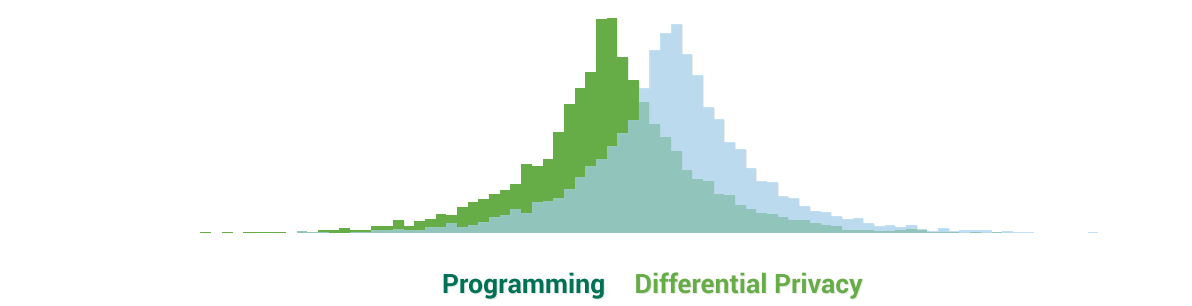

In [4]:
plt.figure(figsize=(15, 4), dpi=80)
_, bins, _ = plt.hist(ys1, bins=100, color='#66AC47',
                     path_effects=[path_effects.withSimplePatchShadow(alpha=.1, offset=(1,-1))])

plt.hist(ys2, bins=bins, alpha=.7, color='#A7D4EE',
        path_effects=[path_effects.withSimplePatchShadow(alpha=.1, offset=(1,-1))])

plt.axis('off');
plt.grid('off');

plt.text(-2.6, -220, 'Programming', fontproperties=f, fontsize=24, 
         color='#007155', 
         path_effects=[path_effects.withSimplePatchShadow(offset=(1, -1), alpha=.1)])

plt.text(0.4, -220, 'Differential Privacy', fontproperties=f, fontsize=24, color='#66AC47',
         path_effects=[path_effects.withSimplePatchShadow(offset=(1, -1), alpha=.1)])

plt.tight_layout()

## Data privacy

> **Definition**
> *Data privacy* techniques have the goal of allowing analysts to learn about *trends* in 
> sensitive data, without revealing information specific to *individuals*.

This is a broad definition, and many different techniques fall under it. 

But it's important to note what this definition *excludes*: techniques for ensuring *security*, like encryption. 

Encrypted data doesn't reveal *anything* - so it fails to meet the first requirement of our definition. 

The distinction between **security** and **privacy** is an important one: 

- **Privacy** techniques involve an *intentional* release of information, and attempt to control *what can be learned* from that release; 

- **Security** techniques usually *prevent* the release of information, and control *who can access* data.